## 第8章 : 分類モデルの評価を行う10本ノック

### ノック71 : 評価対象のモデルを用意しよう

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

load_data = load_breast_cancer()

df = pd.DataFrame(load_data.data, columns=load_data.feature_names)
df["y"] = load_data.target

display(df.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [2]:
X = df[["mean radius", "mean texture"]]
y = df["y"]

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

display(len(X_train))
display(X_train.head())

display(len(X_test))
display(X_test.head())

398

,mean radius,mean texture
478,11.490,14.59
303,10.490,18.61
155,12.250,17.94
186,18.310,18.58
101,6.981,13.43


171

,mean radius,mean texture
512,13.40,20.52
457,13.21,25.25
439,14.02,15.66
298,14.26,18.17
37,13.03,18.42


#### ランダムフォレストモデルの構築および予測値の算出

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf_cls = RandomForestClassifier(max_depth=3, random_state=0).fit(X_train, y_train)

y_train_pred = rf_cls.predict(X_train)
y_test_pred = rf_cls.predict(X_test)

### ノック72 : 正解率を算出しよう

In [15]:
from sklearn.metrics import accuracy_score

print(f"訓練データの正解率 : {accuracy_score(y_train, y_train_pred)}")
print(f"テストデータの正解率 : {accuracy_score(y_test, y_test_pred)}")

訓練データの正解率 : 0.9195979899497487
テストデータの正解率 : 0.8888888888888888


### ノック73 : 混同行列を見てみよう

#### 混同行列の可視化

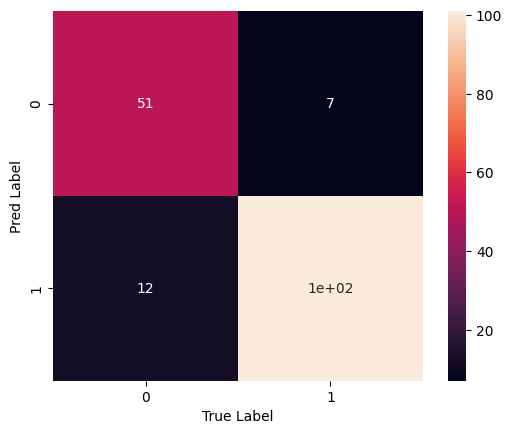

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

matrix = confusion_matrix(y_test, y_test_pred)

sns.heatmap(matrix.T, square=True, annot=True)

plt.xlabel("True Label")
plt.ylabel("Pred Label")
plt.show()

### ノック74 :　適合率を算出しよう

In [19]:
from sklearn.metrics import precision_score

print(f"訓練データ適合率 : {precision_score(y_train, y_train_pred, pos_label=0)}")
print(f"テストデータ適合率 : {precision_score(y_test, y_test_pred, pos_label=0)}")

訓練データ適合率 : 0.9534883720930233
テストデータ適合率 : 0.8793103448275862


### ノック75 : 再現率を算出しよう

In [20]:
from sklearn.metrics import recall_score

print(f"訓練データ再現率 : {recall_score(y_train, y_train_pred, pos_label=0)}")
print(f"テストデータ再現率 : {recall_score(y_test, y_test_pred, pos_label=0)}")

訓練データ再現率 : 0.825503355704698
テストデータ再現率 : 0.8095238095238095


### ノック76 : F1値を算出しよう

In [21]:
from sklearn.metrics import f1_score

print(f"訓練データ再現率 : {f1_score(y_train, y_train_pred, pos_label=0)}")
print(f"テストデータ再現率 : {f1_score(y_test, y_test_pred, pos_label=0)}")

訓練データ再現率 : 0.8848920863309353
テストデータ再現率 : 0.8429752066115702


### ノック77 : 分類レポートを見てみよう

In [23]:
from sklearn.metrics import classification_report

print(f"訓練データ分類レポート : {classification_report(y_train, y_train_pred)}")
print(f"テストデータ分類レポート : {classification_report(y_test, y_test_pred)}")

訓練データ分類レポート :               precision    recall  f1-score   support

           0       0.95      0.83      0.88       149
           1       0.90      0.98      0.94       249

    accuracy                           0.92       398
   macro avg       0.93      0.90      0.91       398
weighted avg       0.92      0.92      0.92       398

テストデータ分類レポート :               precision    recall  f1-score   support

           0       0.88      0.81      0.84        63
           1       0.89      0.94      0.91       108

    accuracy                           0.89       171
   macro avg       0.89      0.87      0.88       171
weighted avg       0.89      0.89      0.89       171



### ノック78 : 予測結果の確信度を算出しよう

In [26]:
pred_proba_train = rf_cls.predict_proba(X_train)
pred_proba_test = rf_cls.predict_proba(X_test)

print(pred_proba_train[:5])
print(pred_proba_test[:5])

[[0.02592192 0.97407808]
 [0.09656751 0.90343249]
 [0.09158286 0.90841714]
 [0.89796431 0.10203569]
 [0.01416888 0.98583112]]
[[0.4094982  0.5905018 ]
 [0.43246982 0.56753018]
 [0.15599818 0.84400182]
 [0.20438491 0.79561509]
 [0.10739119 0.89260881]]


### ノック79 : PR（Precision-Recall）曲線を見てみよう

In [27]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

precision, recall, thresholds = precision_recall_curve(y_test, pred_proba_test[:, 0], pos_label=0)

print(precision[:3])
print(recall[:3])
print(thresholds[:3])

[0.36842105 0.37951807 0.38650307]
[1. 1. 1.]
[0.01416888 0.01965043 0.02044037]


### ノック80 : 各モデルの評価結果を見てみよう